# Regression NBA(national basket association): 
<font size="4"> L'étude de cas se base sur le jeu de données NBA 🏀 </font> 

 **Les attributs dans ce jeu de données :**

GAME_ID: The unique identifier for a game in the dataset.

MATCHUP: The specific matchup that has been considered, including Date and Teams.

LOCATION: A flag to indicate whether it is a Home(H) or Away(A) game.

W: A flag to indicate whether the game is a Win(W) or Loss(L) for the player that made the shot.

FINAL_MARGIN: The point differential between the winning and losing team. Positive if a win and negative if a loss.

SHOT_NUMBER: The number of the shot attempted.

PERIOD: Which quarter the shot was attempted.

GAME_CLOCK: How much time is left from the quarter.

SHOT_CLOCK: How much time is left from the play. Each team has 24 seconds to attempt and attack.

DRIBBLES: Number of dribbles.

TOUCH_TIME: The amount of time the ball has been in the player's hands.

SHOT_DIST: Distance from the basket.

PTS_TYPE: Whether the shot attempted is a 2 or 3 pointer.

SHOT_RESULT: A flag to indicate if the shot is Missed(missed) or Made(made)

CLOSEST_DEFENDER: Name of the closest defender

CLOSEST_DEFENDER_PLAYER_ID: Id of the closest defender

CLOSE_DEF_DIS: Distance of the closest defender

FGM: Field Goals Made statistic

PTS: Points made.

PLAYER_NAME: Name of the player attempting the shot

PLAYER_ID: Unique ID of the player attempting the shot

### -------------------------
#### -->we can apply classification on this dataset :prediction if the player's shot is missed or made (predict the shot_result)
#### -->here we want applt regression to predict the SHOT_DIST 
### -------------------------

# --> note:each line in the df is a player's shot

In [2]:
import pandas as pd
nba=pd.read_csv("../datasets/NBA.csv")

In [3]:
nba.head()

,GAME_ID,LOCATION,GAME_RESULT,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,SHOOTER
0,21400899,A,W,1,10.8,2,1.9,7.7,2,made,1.3,brian roberts
1,21400899,A,W,1,3.4,0,0.8,28.2,3,missed,6.1,brian roberts
2,21400899,A,W,1,NaN,3,2.7,10.1,2,missed,0.9,brian roberts
3,21400899,A,W,2,10.3,2,1.9,17.2,2,missed,3.4,brian roberts
4,21400899,A,W,2,10.9,2,2.7,3.7,2,missed,1.1,brian roberts


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   GAME_ID         128069 non-null  int64  
 1   LOCATION        128069 non-null  object 
 2   GAME_RESULT     128069 non-null  object 
 3   PERIOD          128069 non-null  int64  
 4   SHOT_CLOCK      122502 non-null  float64
 5   DRIBBLES        128069 non-null  int64  
 6   TOUCH_TIME      127753 non-null  float64
 7   SHOT_DIST       128069 non-null  float64
 8   PTS_TYPE        128069 non-null  int64  
 9   SHOT_RESULT     128069 non-null  object 
 10  CLOSE_DEF_DIST  128069 non-null  float64
 11  SHOOTER         128069 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 11.7+ MB


In [6]:
nba.PERIOD.value_counts()

PERIOD
1    33961
3    32211
2    31651
4    29123
5      912
6      168
7       43
Name: count, dtype: int64

In [7]:
nba.shape

(128069, 12)

In [8]:
nba.describe(include=object)
#only describe strings-->nb of values,nb of unique values,top element,frequency of the top element

,LOCATION,GAME_RESULT,SHOT_RESULT,SHOOTER
count,128069,128069,128069,128069
unique,2,2,2,281
top,A,W,missed,james harden
freq,64135,64595,70164,1054


In [9]:
nba.dropna(axis=0,how="any",inplace=True)
#drop any line contain nan value from the original df

In [11]:
nba.shape
#as we see approximatly 600 lines are deleted 

(122200, 12)

In [12]:
nba.LOCATION.value_counts()

LOCATION
A    61158
H    61042
Name: count, dtype: int64

In [13]:
X=nba[["LOCATION","PERIOD","SHOT_CLOCK","DRIBBLES","TOUCH_TIME","SHOT_RESULT","CLOSE_DEF_DIST","PTS_TYPE"]]
X=pd.get_dummies(data=X,columns=["LOCATION","SHOT_RESULT"])
X.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,LOCATION_H,SHOT_RESULT_made,SHOT_RESULT_missed
0,1,10.8,2,1.9,1.3,2,True,False,True,False
1,1,3.4,0,0.8,6.1,3,True,False,False,True
3,2,10.3,2,1.9,3.4,2,True,False,False,True
4,2,10.9,2,2.7,1.1,2,True,False,False,True
5,2,9.1,2,4.4,2.6,2,True,False,False,True


In [15]:
y=nba.SHOT_DIST
y

0          7.7
1         28.2
3         17.2
4          3.7
5         18.4
          ... 
128063     8.9
128064     8.7
128065     0.6
128066    16.9
128067    18.3
Name: SHOT_DIST, Length: 122200, dtype: float64

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

NameError: name 'X' is not defined

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,LOCATION_H,SHOT_RESULT_made,SHOT_RESULT_missed
0,1.341547,1.570993,-0.583603,0.012903,-1.363043,-0.590275,0.999486,-0.999486,1.092038,-1.092038
1,0.461733,0.042791,-0.583603,-0.633030,-0.593381,-0.590275,-1.000515,1.000515,1.092038,-1.092038
2,1.341547,0.789526,-0.583603,-0.633030,0.762690,1.694126,0.999486,-0.999486,1.092038,-1.092038
3,-1.297896,-0.738676,-0.291241,-0.327062,0.176281,-0.590275,-1.000515,1.000515,-0.915719,0.915719
4,1.341547,-0.373991,-0.583603,-0.837009,0.909292,-0.590275,-1.000515,1.000515,-0.915719,0.915719


In [22]:
X_train.drop(columns=["LOCATION_H","SHOT_RESULT_missed"],inplace=True)
X_train.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,SHOT_RESULT_made
0,1.341547,1.570993,-0.583603,0.012903,-1.363043,-0.590275,0.999486,1.092038
1,0.461733,0.042791,-0.583603,-0.633030,-0.593381,-0.590275,-1.000515,1.092038
2,1.341547,0.789526,-0.583603,-0.633030,0.762690,1.694126,0.999486,1.092038
3,-1.297896,-0.738676,-0.291241,-0.327062,0.176281,-0.590275,-1.000515,-0.915719
4,1.341547,-0.373991,-0.583603,-0.837009,0.909292,-0.590275,-1.000515,-0.915719


In [32]:
X_test.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,SHOT_RESULT_made
0,1.341547,0.442207,2.924743,2.460651,-0.446779,-0.590275,-1.000515,1.092038
1,1.341547,2.005142,-0.583603,-0.938999,-1.326392,-0.590275,0.999486,1.092038
2,-1.297896,0.216450,-0.583603,-0.565037,-1.069838,-0.590275,-1.000515,-0.915719
3,1.341547,1.015283,-0.583603,-0.633030,-0.446779,1.694126,-1.000515,-0.915719
4,-1.297896,-1.606973,0.001121,-0.191076,-0.300176,-0.590275,-1.000515,1.092038


In [23]:
scaler.mean_,scaler.var_
#returns 2 arrays:first contains the means of each column in the X_train
#and the other contains the variance of each columns in the X_train
#this 2(mean and var(std=racine lal var)) help for normalization

(array([ 2.47519289, 12.45359247,  1.99616554,  2.76204583,  4.11902268,
         2.25839373,  0.50025719,  0.49974281,  0.45609072,  0.54390928]),
 array([ 1.29186766, 33.15917426, 11.69923711,  8.65229855,  7.4445528 ,
         0.19162641,  0.24999993,  0.24999993,  0.24807197,  0.24807197]))

In [24]:
y_train.mean(),y_test.mean()

(13.450939911152679, 13.444604473540641)

In [26]:
X_train.LOCATION_A.value_counts()

LOCATION_A
 0.999486    42792
-1.000515    42748
Name: count, dtype: int64

In [27]:
X_test.LOCATION_A.value_counts()

LOCATION_A
True     18366
False    18294
Name: count, dtype: int64

# TRAINING

## 1)regression linear multiple

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [29]:
#akid rje3na jahazna l X_test metel l X_train w mahayna li mahaynehon fo2
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.drop(columns=["LOCATION_H","SHOT_RESULT_missed"],inplace=True)
X_test.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,SHOT_RESULT_made
0,1.341547,0.442207,2.924743,2.460651,-0.446779,-0.590275,-1.000515,1.092038
1,1.341547,2.005142,-0.583603,-0.938999,-1.326392,-0.590275,0.999486,1.092038
2,-1.297896,0.216450,-0.583603,-0.565037,-1.069838,-0.590275,-1.000515,-0.915719
3,1.341547,1.015283,-0.583603,-0.633030,-0.446779,1.694126,-1.000515,-0.915719
4,-1.297896,-1.606973,0.001121,-0.191076,-0.300176,-0.590275,-1.000515,1.092038


In [31]:
y_pred=model.predict(X_test)
y_pred

array([ 8.70809819,  2.95487034,  7.86097545, ..., 23.98271245,
       10.30453128, 14.85408245])

In [33]:
model.coef_,model.intercept_
#equation de prediction(SHOT_DIST=.....)with 8 coeficient and the constant b

(array([-0.06801385, -1.27935751,  0.2197515 ,  0.2188164 ,  2.60285833,
         5.30721677,  0.02534841, -0.86629269]),
 13.450939911152682)

In [34]:
y_test.mean()

13.444604473540641

In [35]:
y_pred.mean()

13.472947520385233

## -->as we see that the mean of the predicted value is so close from the real values (values in the dataset)
### - but this step don't estimates the performance its only for analysis then we must find the RMSE to estimate the performance 

In [42]:
from sklearn.metrics import mean_squared_error
print("RMSE=",mean_squared_error(y_test,y_pred,squared=False))
#here nehna mghaltin bi 5.28 feet yaani bi 1.5 meter 
#distance in this model is mesured by feet 
# 1 meter=3 feet
#on multiplie par 0.3 pour avoir un résultat en metre
print((mean_squared_error(y_test, y_pred, squared=False)/y_test.mean()))
#here we see how the error aam yghallet bl nesbi lal mean 
#aam yghallet 0.3% mn 13.44 bl nesbi lal mean-->mauvais model

RMSE= 5.288720202511405
0.3933712005377142


In [44]:
coef=pd.DataFrame(lm.coef_,columns=["coef"],index=X_train.columns)
coef.loc["Constante"]=lm.intercept_
coef

,coef
PERIOD,-0.068014
SHOT_CLOCK,-1.279358
DRIBBLES,0.219752
TOUCH_TIME,0.218816
CLOSE_DEF_DIST,2.602858
PTS_TYPE,5.307217
LOCATION_A,0.025348
SHOT_RESULT_made,-0.866293
Constante,13.450940


<Axes: >

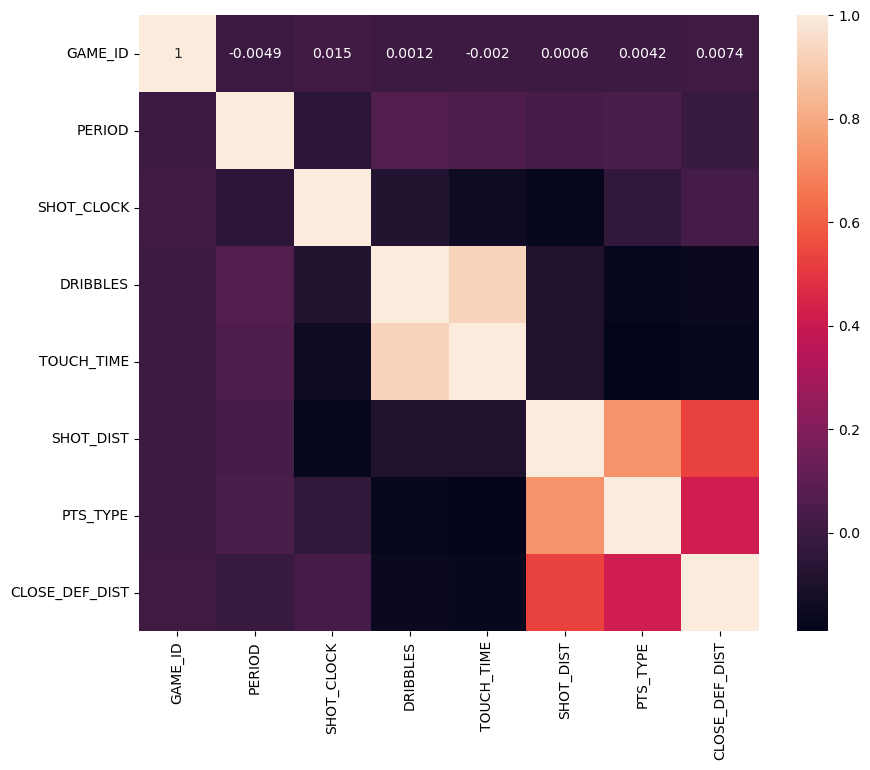

In [46]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(nba.select_dtypes(include="number").corr(),annot=True,ax=ax)

## apply the polynomial regression maybe it done a good model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [49]:
polynomial=PolynomialFeatures(degree=2,include_bias=False,interaction_only=False)
X_train_poly=polynomial.fit_transform(X_train)#like scaler
#fit_transform return a numpy array without columns name then we assign it in a df
X_train_poly=pd.DataFrame(X_train_poly,columns=polynomial.get_feature_names_out())

In [50]:
X_train_poly.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,SHOT_RESULT_made,PERIOD^2,PERIOD SHOT_CLOCK,...,CLOSE_DEF_DIST^2,CLOSE_DEF_DIST PTS_TYPE,CLOSE_DEF_DIST LOCATION_A,CLOSE_DEF_DIST SHOT_RESULT_made,PTS_TYPE^2,PTS_TYPE LOCATION_A,PTS_TYPE SHOT_RESULT_made,LOCATION_A^2,LOCATION_A SHOT_RESULT_made,SHOT_RESULT_made^2
0,1.341547,1.570993,-0.583603,0.012903,-1.363043,-0.590275,0.999486,1.092038,1.799748,2.107561,...,1.857886,0.804570,-1.362342,-1.488494,0.348424,-0.589971,-0.644602,0.998972,1.091476,1.192546
1,0.461733,0.042791,-0.583603,-0.633030,-0.593381,-0.590275,-1.000515,1.092038,0.213197,0.019758,...,0.352101,0.350258,0.593686,-0.647994,0.348424,0.590579,-0.644602,1.001029,-1.092600,1.192546
2,1.341547,0.789526,-0.583603,-0.633030,0.762690,1.694126,0.999486,1.092038,1.799748,1.059186,...,0.581696,1.292093,0.762298,0.832886,2.870063,1.693255,1.850049,0.998972,1.091476,1.192546
3,-1.297896,-0.738676,-0.291241,-0.327062,0.176281,-0.590275,-1.000515,-0.915719,1.684533,0.958724,...,0.031075,-0.104054,-0.176372,-0.161424,0.348424,0.590579,0.540526,1.001029,0.916190,0.838542
4,1.341547,-0.373991,-0.583603,-0.837009,0.909292,-0.590275,-1.000515,-0.915719,1.799748,-0.501727,...,0.826812,-0.536732,-0.909760,-0.832656,0.348424,0.590579,0.540526,1.001029,0.916190,0.838542


In [51]:
#we apply also the same on the test dataset(like scaler 100%)
X_test_poly=polynomial.transform(X_test)
X_test_poly=pd.DataFrame(X_test_poly,columns=polynomial.get_feature_names_out())

In [52]:
X_test_poly.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,CLOSE_DEF_DIST,PTS_TYPE,LOCATION_A,SHOT_RESULT_made,PERIOD^2,PERIOD SHOT_CLOCK,...,CLOSE_DEF_DIST^2,CLOSE_DEF_DIST PTS_TYPE,CLOSE_DEF_DIST LOCATION_A,CLOSE_DEF_DIST SHOT_RESULT_made,PTS_TYPE^2,PTS_TYPE LOCATION_A,PTS_TYPE SHOT_RESULT_made,LOCATION_A^2,LOCATION_A SHOT_RESULT_made,SHOT_RESULT_made^2
0,1.341547,0.442207,2.924743,2.460651,-0.446779,-0.590275,-1.000515,1.092038,1.799748,0.593242,...,0.199611,0.263722,0.447009,-0.487899,0.348424,0.590579,-0.644602,1.001029,-1.092600,1.192546
1,1.341547,2.005142,-0.583603,-0.938999,-1.326392,-0.590275,0.999486,1.092038,1.799748,2.689992,...,1.759317,0.782936,-1.325710,-1.448470,0.348424,-0.589971,-0.644602,0.998972,1.091476,1.192546
2,-1.297896,0.216450,-0.583603,-0.565037,-1.069838,-0.590275,-1.000515,-0.915719,1.684533,-0.280930,...,1.144554,0.631499,1.070389,0.979672,0.348424,0.590579,0.540526,1.001029,0.916190,0.838542
3,1.341547,1.015283,-0.583603,-0.633030,-0.446779,1.694126,-1.000515,-0.915719,1.799748,1.362050,...,0.199611,-0.756899,0.447009,0.409124,2.870063,-1.694998,-1.551344,1.001029,0.916190,0.838542
4,-1.297896,-1.606973,0.001121,-0.191076,-0.300176,-0.590275,-1.000515,1.092038,1.684533,2.085683,...,0.090106,0.177187,0.300331,-0.327804,0.348424,0.590579,-0.644602,1.001029,-1.092600,1.192546


In [53]:
#we apply lasso on the polynomial dataframe
alpha_values=[0.05,0.1,0.2,0.4]
for alpha in alpha_values:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly,y_train)
    print("alpha:",alpha)
    print("RMSE train set:",mean_squared_error(y_train,lasso_model.predict(X_train_poly),squared=False))
    print("RMSE test set:",mean_squared_error(y_test,lasso_model.predict(X_test_poly),squared=False))
# as we see the error is 4. then is better than from the linear regression(error=5. )
#yaani l error woti w thassan l model shway

C:\Users\ghadir\miniconda3\envs\I3344\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.266e+03, tolerance: 6.587e+02
  model = cd_fast.enet_coordinate_descent(


alpha: 0.05
RMSE train set: 4.655962474786438
RMSE test set: 4.672712221043121
alpha: 0.1
RMSE train set: 4.672995280593675
RMSE test set: 4.691083275642822
alpha: 0.2
RMSE train set: 4.733316378152664
RMSE test set: 4.754108759530398
alpha: 0.4
RMSE train set: 4.848636611189763
RMSE test set: 4.865701377718731


In [ ]:
#apply lasso on the best alpha
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train_poly,y_train)


In [55]:
#equation polynomial after lasso
coef=pd.DataFrame(lasso_model.coef_,columns=["coef"],index=X_train_poly.columns)
coef.loc["Constante"]=lasso_model.intercept_
coef

,coef
PERIOD,-0.000000
SHOT_CLOCK,-1.008718
DRIBBLES,0.055843
TOUCH_TIME,0.428301
CLOSE_DEF_DIST,3.784625
PTS_TYPE,0.000000
LOCATION_A,0.000000
SHOT_RESULT_made,-0.748340
PERIOD^2,0.000000
PERIOD SHOT_CLOCK,-0.000000
